In [ ]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import CubicSpline
sns.set()

In [100]:
#Initialize API
fred = Fred(api_key='642bcab619456030e8f5970e482486df')

#List of Treasuries IDs
series_ids = ['DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS5', 'DGS10', 'DGS20', 'DGS30']

#Function to get data for single series
def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start = '2000-01-01', observation_end = "2025-04-04")
    return data
#Get data for all series
yields_dict = {series_id : get_yield_data(series_id) for series_id in series_ids}

#Dataframe format
yields = pd.DataFrame(yields_dict)
#Rename columns
mat= ['3 Month','6 Month', '1 Year', '2 Year', '5 Year', '10 Year', '20 Year', '30 Year']
yields.columns = mat

In [101]:
yields.index = pd.to_datetime(yields.index)

In [102]:
from nelson_siegel_svensson.calibrate import calibrate_ns_ols

In [103]:
t = np.array([0.25,0.5,1,2,5,10,20,30])
y = np.array(yields.loc["2025-04-04"])

In [104]:
curve, status = calibrate_ns_ols(t, y, tau0=1.0) 
print(curve)

NelsonSiegelCurve(beta0=4.671181966403881, beta1=-0.205040321638581, beta2=-3.232831940006754, tau=1.8334213324806143)


Text(0.5, 1.0, 'Nelson Spiegel Interpolation for 2025-04-04 US Gov Bonds')

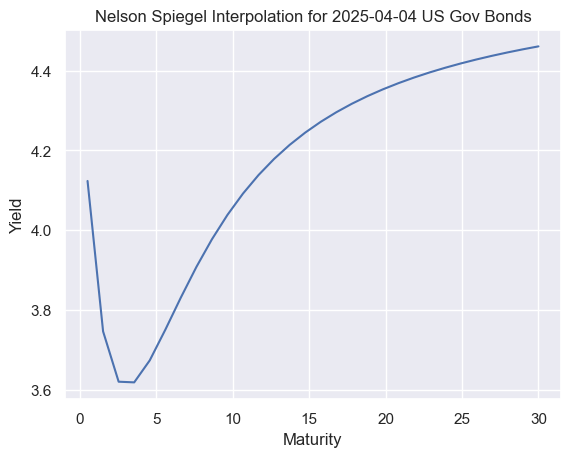

In [105]:
y_hat = curve
t_hat = np.linspace(0.5,30,30)
plt.plot(t_hat, y_hat(t_hat))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Nelson Spiegel Interpolation for 2025-04-04 US Gov Bonds")

/var/folders/f7/krq4wgqx3gx1gxzm3td0hqvr0000gn/T/ipykernel_1002/2786622740.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


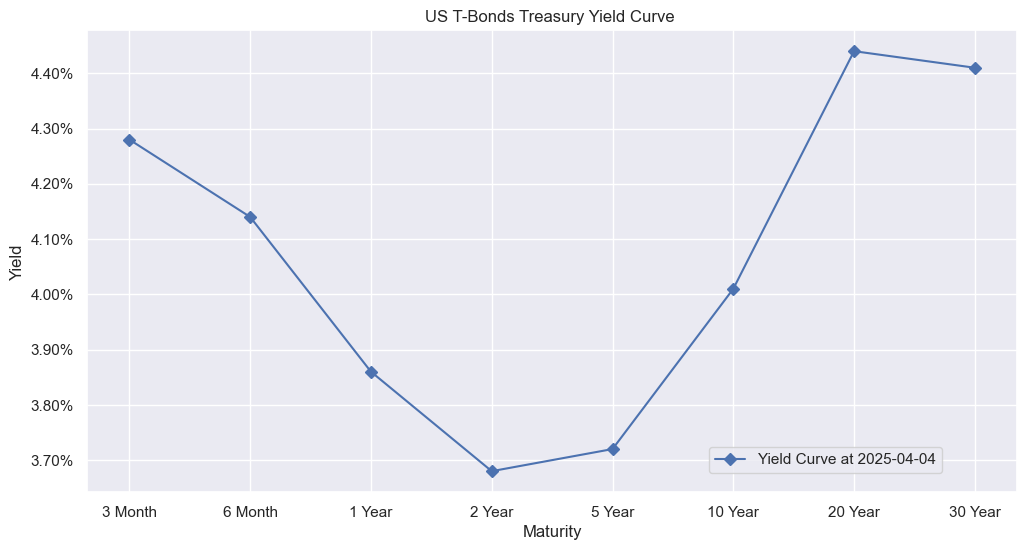

In [106]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(mat, yields.loc['2025-04-04'], marker='D', label='Yield Curve at 2025-04-04')

ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
ax.set_xticks(range(len(mat)))
ax.set_xticklabels(mat)

# Add labels and title
ax.set_xlabel('Maturity')
ax.set_ylabel('Yield')
ax.set_title('US T-Bonds Treasury Yield Curve ')


fig.legend(loc = [0.69, 0.14])

# Show the plot
plt.grid(True)
plt.show()

In [107]:
yields.iloc[-1]

3 Month    4.28
6 Month    4.14
1 Year     3.86
2 Year     3.68
5 Year     3.72
10 Year    4.01
20 Year    4.44
30 Year    4.41
Name: 2025-04-04 00:00:00, dtype: float64

Text(0.5, 1.0, 'Cubic Spline Interpolation for 2025-04-04 US Gov Bonds')

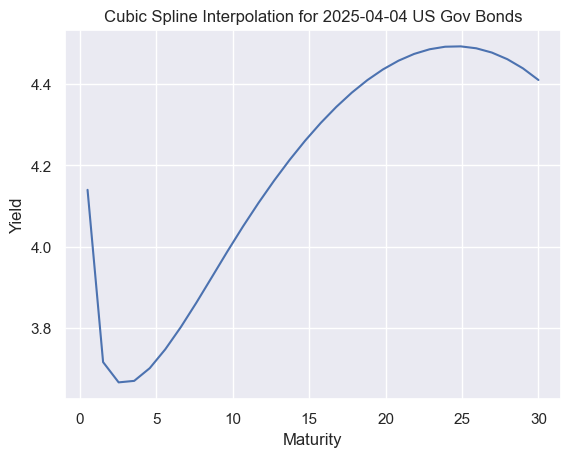

In [108]:
maturities = np.array([0.25,0.5,1,2,5,10,20,30])
y = np.array(yields.iloc[-1])
cs = CubicSpline(maturities, y)
yield_curve = cs(t_hat)
plt.plot(t_hat, yield_curve)
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Cubic Spline Interpolation for 2025-04-04 US Gov Bonds")

Text(0.5, 1.0, 'Comparison of Cubic Spline and Nelson Spiegel Model for 2025-04-04 US Gov Bonds')

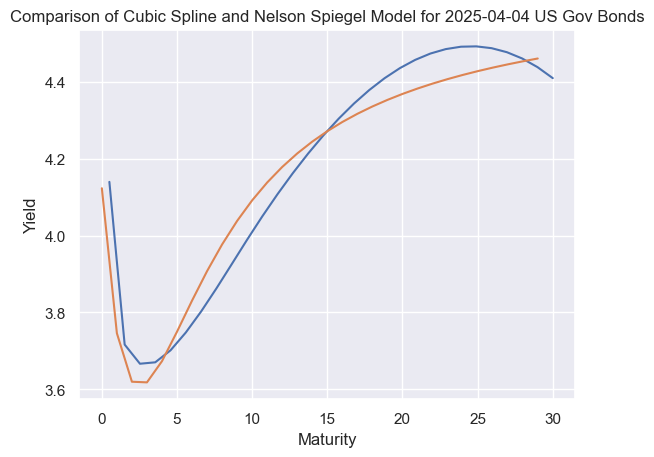

In [109]:
#Plot comparing both interpolation methods :
plt.plot(t_hat, yield_curve, y_hat(t_hat))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Comparison of Cubic Spline and Nelson Spiegel Model for 2025-04-04 US Gov Bonds")

NelsonSiegelCurve(beta0=4.671181966403881, beta1=-0.205040321638581, beta2=-3.232831940006754, tau=1.8334213324806143)


/var/folders/f7/krq4wgqx3gx1gxzm3td0hqvr0000gn/T/ipykernel_1002/703914994.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


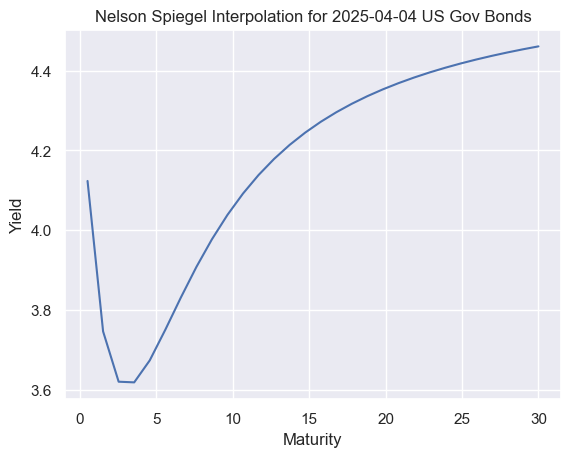

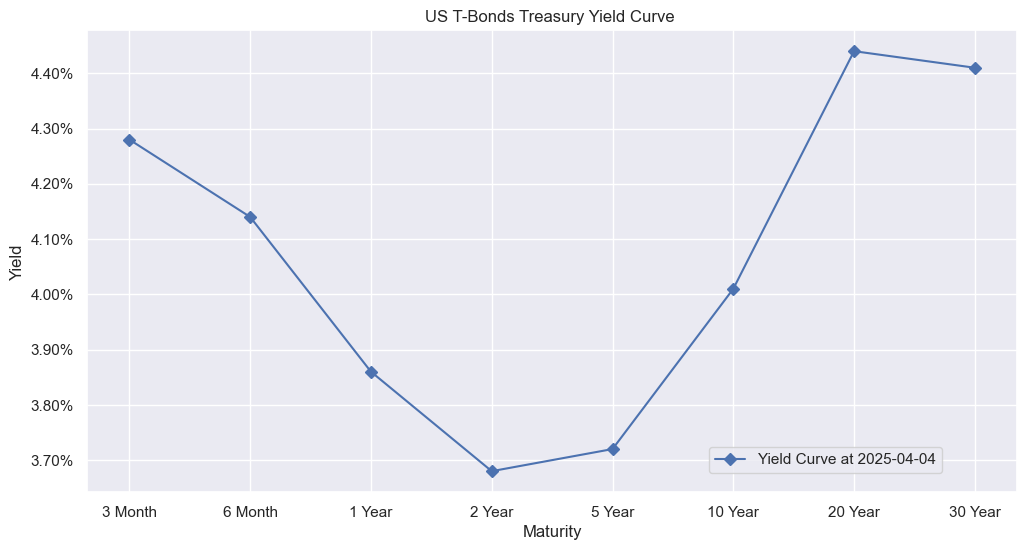

Text(0.5, 1.0, 'Comparison of Cubic Spline and Nelson Spiegel Model for 2025-04-04 US Gov Bonds')

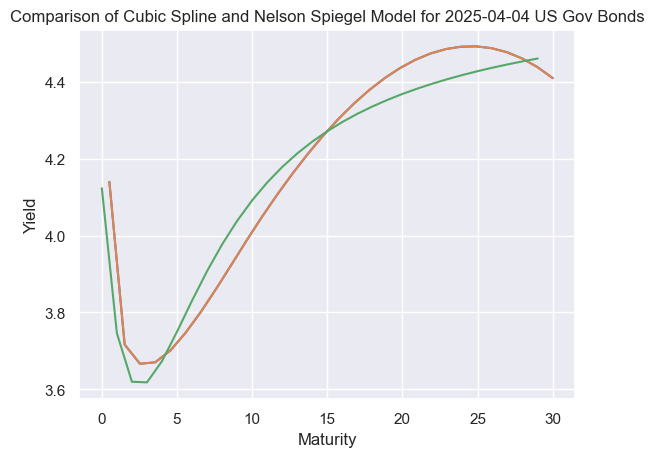

In [110]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import CubicSpline
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
sns.set()

fred = Fred(api_key='642bcab619456030e8f5970e482486df')
#%aturities 
series_ids = ['DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS5', 'DGS10', 'DGS20', 'DGS30']

def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start = '2000-01-01', observation_end = "2025-04-04")
    return data
#Get data for all series
yields_dict = {series_id : get_yield_data(series_id) for series_id in series_ids}

#Dataframe format
yields = pd.DataFrame(yields_dict)
#Rename columns
mat= ['3 Month','6 Month', '1 Year', '2 Year', '5 Year', '10 Year', '20 Year', '30 Year']
yields.columns = mat
yields.index = pd.to_datetime(yields.index)

#Setting Up NS Interpolation
t = np.array([0.25,0.5,1,2,5,10,20,30])
y = np.array(yields.loc["2025-04-04"])
#Fitting
curve, status = calibrate_ns_ols(t, y, tau0=1.0) 
print(curve)

#Plotting NS 
y_hat = curve
t_hat = np.linspace(0.5,30,30)
plt.plot(t_hat, y_hat(t_hat))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Nelson Spiegel Interpolation for 2025-04-04 US Gov Bonds")

#Plotting True yield curve
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(mat, yields.loc['2025-04-04'], marker='D', label='Yield Curve at 2025-04-04')

ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
ax.set_xticks(range(len(mat)))
ax.set_xticklabels(mat)

# Add labels and title
ax.set_xlabel('Maturity')
ax.set_ylabel('Yield')
ax.set_title('US T-Bonds Treasury Yield Curve ')


fig.legend(loc = [0.69, 0.14])

# Show the plot
plt.grid(True)
plt.show()

#Creating Cubic Spline
maturities = np.array([0.25,0.5,1,2,5,10,20,30])
y = np.array(yields.iloc[-1])
cs = CubicSpline(maturities, y)
yield_curve = cs(t_hat)
plt.plot(t_hat, yield_curve)
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Cubic Spline Interpolation for 2025-04-04 US Gov Bonds")

#Plot comparing both interpolation methods :
plt.plot(t_hat, yield_curve, y_hat(t_hat))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Comparison of Cubic Spline and Nelson Spiegel Model for 2025-04-04 US Gov Bonds")

NelsonSiegelCurve(beta0=4.671181966403881, beta1=-0.205040321638581, beta2=-3.232831940006754, tau=1.8334213324806143)


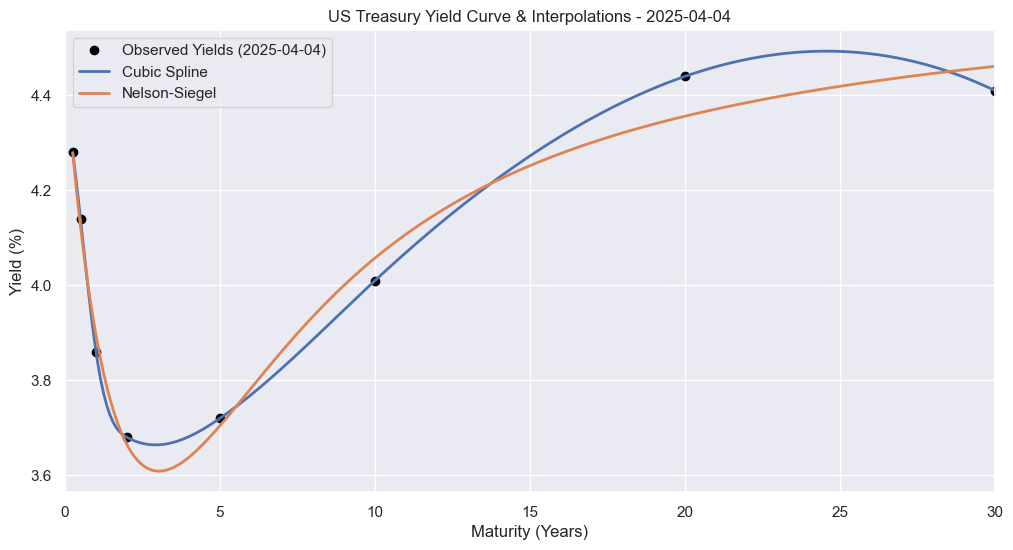

In [ ]:
giv